# 幾何図形とフラクタルを描画する
## matplotlibのパッチで幾何図形を描く

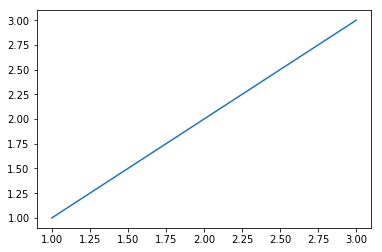

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]
plt.plot(x, y)
plt.show()

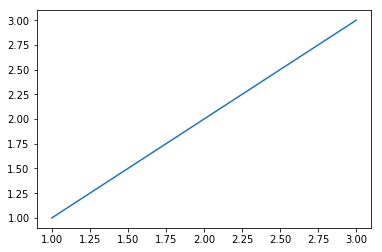

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y)
plt.show()

### 円を描く

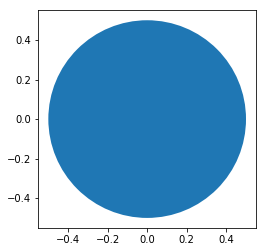

In [4]:
'''
matplotlibの円パッチの使用例
'''
import matplotlib.pyplot as plt


def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle


def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()


if __name__ == '__main__':
    c = create_circle()
    show_shape(c)


### 図形のアニメーションを作る

In [1]:
'''
大きくなる円
'''

from matplotlib import pyplot as plt
from matplotlib import animation


def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle


def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle


def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_radius, fargs=(circle,), frames=30, interval=50)
    plt.title('Simple Circle Animation')
    plt.show()


if __name__ == '__main__':
    create_animation()


<Figure size 640x480 with 1 Axes>

### 投射軌跡のアニメーション

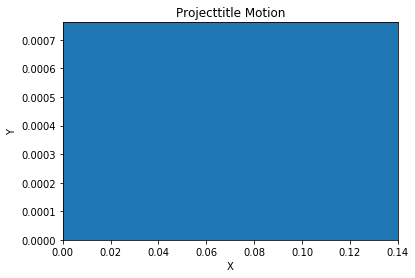

In [3]:
'''
投射運動オブジェクトの軌跡アニメーション
'''

from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8


def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta) / g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals


def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t * t
    circle.center = x, y
    return circle


def create_animation(u, theta):
    intervals = get_intervals(u, theta)

    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    t_max = u * math.sin(theta) / g
    ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max ** 2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))

    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position, fargs=(circle, intervals, u, theta), frames=len(intervals),
                                   interval=1, repeat=False)
    plt.title('Projecttitle Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


if __name__ == '__main__':
    try:
        u = float(1)
        theta = float(1)
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(7, theta)


### 平面上の点の変換

In [2]:
'''
２つの等確率変換を選ぶ例
'''
import matplotlib.pyplot as plt
import random


def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1


def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1


def transform(p):
    transformations = [transformation_1, transformation_2]
    t = random.choice(transformations)
    x, y = t(p)
    return x, y


def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y


if __name__ == '__main__':
    from IPython.core.debugger import Pdb; Pdb().set_trace()
    p = (1, 1)
    n = int(10000)
    x, y = build_trajectory(p, n)
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


> <ipython-input-2-1eab0f857528>(39)<module>()
     37 if __name__ == '__main__':
     38     from IPython.core.debugger import Pdb; Pdb().set_trace()
---> 39     p = (1, 1)
     40     n = int(10000)
     41     x, y = build_trajectory(p, n)



StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.